# Uber - Time Series Analysis

In [17]:
from IPython.display import Image
Image(url ="https://images.hertz.com/content/dam/irac/Overlay/enUS/misc/UberApp.png")

In [18]:
# importing libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [19]:
data = pd.read_csv('UBER.csv')
data.head()

,Date,Open,High,Low,Close,Adj Close,Volume
0,2019-05-10,42.000000,45.000000,41.060001,41.570000,41.570000,186322500
1,2019-05-13,38.790001,39.240002,36.080002,37.099998,37.099998,79442400
2,2019-05-14,38.310001,39.959999,36.849998,39.959999,39.959999,46661100
3,2019-05-15,39.369999,41.880001,38.950001,41.290001,41.290001,36086100
4,2019-05-16,41.480000,44.060001,41.250000,43.000000,43.000000,38115500


In [3]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 725 entries, 0 to 724
Data columns (total 7 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   Date       725 non-null    object 
 1   Open       725 non-null    float64
 2   High       725 non-null    float64
 3   Low        725 non-null    float64
 4   Close      725 non-null    float64
 5   Adj Close  725 non-null    float64
 6   Volume     725 non-null    int64  
dtypes: float64(5), int64(1), object(1)
memory usage: 39.8+ KB


In [5]:
data.shape

(725, 7)

In [4]:
data.isnull().sum()

Date         0
Open         0
High         0
Low          0
Close        0
Adj Close    0
Volume       0
dtype: int64

In [16]:
data.describe()

,Open,High,Low,Close,Adj Close,Volume
count,725.000000,725.000000,725.000000,725.000000,725.000000,7.250000e+02
mean,40.166447,40.961435,39.261123,40.107255,40.107255,2.472855e+07
std,9.198940,9.259164,9.075919,9.141862,9.141862,1.691406e+07
min,15.960000,17.799999,13.710000,14.820000,14.820000,3.380000e+06
25%,32.730000,33.419998,31.983000,32.799999,32.799999,1.423060e+07
50%,39.000000,39.959999,38.009998,38.810001,38.810001,2.079540e+07
75%,46.700001,47.520000,45.860001,46.419998,46.419998,3.011960e+07
max,63.250000,64.050003,60.799999,63.180000,63.180000,1.863225e+08


## Analysis for the year 2019

- Open vs Close
- High vs Low
- Date vs Volume

In [20]:
data_filtered = data[(data.Date >= "2019-01-01") & (data.Date <= "2019-12-31")]

In [21]:
print("Start Date : ",data_filtered.Date.min())
print("End Date   : ",data_filtered.Date.max())

Start Date :  2019-05-10
End Date   :  2019-12-31


In [22]:
print("Distribution Variance for Close vs Adj Close : {:.2f}".format(np.linalg.norm(data_filtered.Close - data_filtered["Adj Close"])))

Distribution Variance for Close vs Adj Close : 0.00


Inference : 0 variance for the Close vs Adj Close shows that adjusted closing was equal to closing price all times
or almost all times.



Distribution Variance for Open vs Close : 10.66


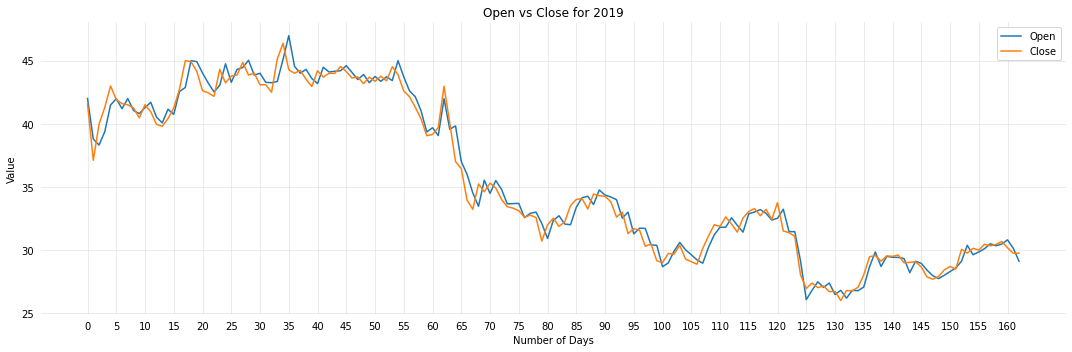

In [23]:
print("Distribution Variance for Open vs Close : {:.2f}".format(np.linalg.norm(data_filtered.Open - data_filtered.Close)))
plt.rcParams["axes.linewidth"]="0"
plt.figure(figsize=(15,5))
plt.plot(list(range(data_filtered.Date.size)),data_filtered.Open,label="Open")
plt.plot(list(range(data_filtered.Date.size)),data_filtered.Close,label="Close")
plt.tick_params(bottom=False,left=False)
plt.title("Open vs Close for 2019")
plt.xlabel("Number of Days")
plt.ylabel("Value")
plt.xticks(np.arange(0,data_filtered.Open.size+1,5))
plt.grid(True,linewidth=0.5,alpha=0.5)
plt.legend()
plt.tight_layout()

In [24]:
print("Highest Opening Price Date : ",data_filtered[data_filtered.Open == data_filtered.Open.max()].Date.values[0])
print("Highest Closing Price Date : ",data_filtered[data_filtered.Close == data_filtered.Close.max()].Date.values[0])

print("Lowest Opening Price Date  : ",data_filtered[data_filtered.Open == data_filtered.Open.min()].Date.values[0])
print("Lowest Closing Price Date  : ",data_filtered[data_filtered.Close == data_filtered.Close.min()].Date.values[0])

Highest Opening Price Date :  2019-07-01
Highest Closing Price Date :  2019-06-28
Lowest Opening Price Date  :  2019-11-06
Lowest Closing Price Date  :  2019-11-14




Distribution Variance for High vs Low : 18.86


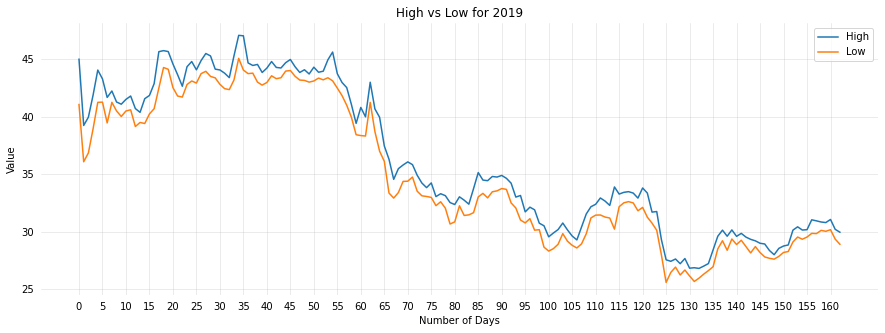

In [25]:
print("\n\nDistribution Variance for High vs Low : {:.2f}".format(np.linalg.norm(data_filtered.High - data_filtered.Low)))
plt.rcParams["axes.linewidth"]="0"
plt.figure(figsize=(15,5))
plt.plot(list(range(data_filtered.Date.size)),data_filtered.High,label="High")
plt.plot(list(range(data_filtered.Date.size)),data_filtered.Low,label="Low")
plt.tick_params(bottom=False,left=False)
plt.title("High vs Low for 2019")
plt.xlabel("Number of Days")
plt.ylabel("Value")
plt.xticks(np.arange(0,data_filtered.Open.size+1,5))
plt.grid(True,linewidth=0.5,alpha=0.5)
plt.legend()
plt.show()

In [26]:
print("Peak High Price Date    : ",data_filtered[data_filtered.High == data_filtered.High.max()].Date.values[0])
print("Peak Low Price Date     : ",data_filtered[data_filtered.Low == data_filtered.Low.max()].Date.values[0])

print("Lowest High Price Date  : ",data_filtered[data_filtered.High == data_filtered.High.min()].Date.values[0])
print("Lowest Low Price Date   : ",data_filtered[data_filtered.Low == data_filtered.Low.min()].Date.values[0])


Peak High Price Date    :  2019-06-28
Peak Low Price Date     :  2019-06-28
Lowest High Price Date  :  2019-11-15
Lowest Low Price Date   :  2019-11-06


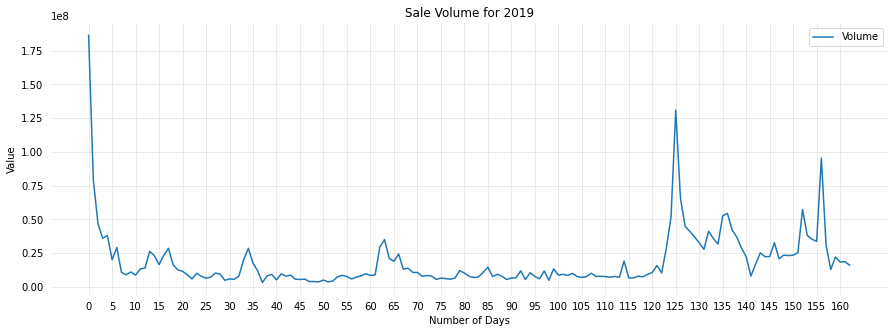

In [27]:
plt.rcParams["axes.linewidth"]="0"
plt.figure(figsize=(15,5))
plt.plot(list(range(data_filtered.Date.size)),data_filtered.Volume,label="Volume")
plt.tick_params(bottom=False,left=False)
plt.title("Sale Volume for 2019")
plt.xlabel("Number of Days")
plt.ylabel("Value")
plt.xticks(np.arange(0,data_filtered.Open.size+1,5))
plt.grid(True,linewidth=0.5,alpha=0.5)
plt.legend()
plt.show()

In [28]:
print("Peak Volume Date   : ",data_filtered[data_filtered.Volume == data_filtered.Volume.max()].Date.values[0])
print("Lowest Volume Date : ",data_filtered[data_filtered.Volume == data_filtered.Volume.min()].Date.values[0])

Peak Volume Date   :  2019-05-10
Lowest Volume Date :  2019-07-03


## Analysis for the year 2020
- Open vs Close
- High vs Low
- Date vs Volume

In [29]:
data_filtered = data[(data.Date >= "2020-01-01") & (data.Date <= "2020-12-31")]

In [30]:
print("Start Date : ",data_filtered.Date.min())
print("End Date   : ",data_filtered.Date.max())

Start Date :  2020-01-02
End Date   :  2020-12-31


In [31]:
print("Distribution Variance for Close vs Adj Close : {:.2f}".format(np.linalg.norm(data_filtered.Close - data_filtered["Adj Close"])))

Distribution Variance for Close vs Adj Close : 0.00


Distribution Variance for Open vs Close : 16.51


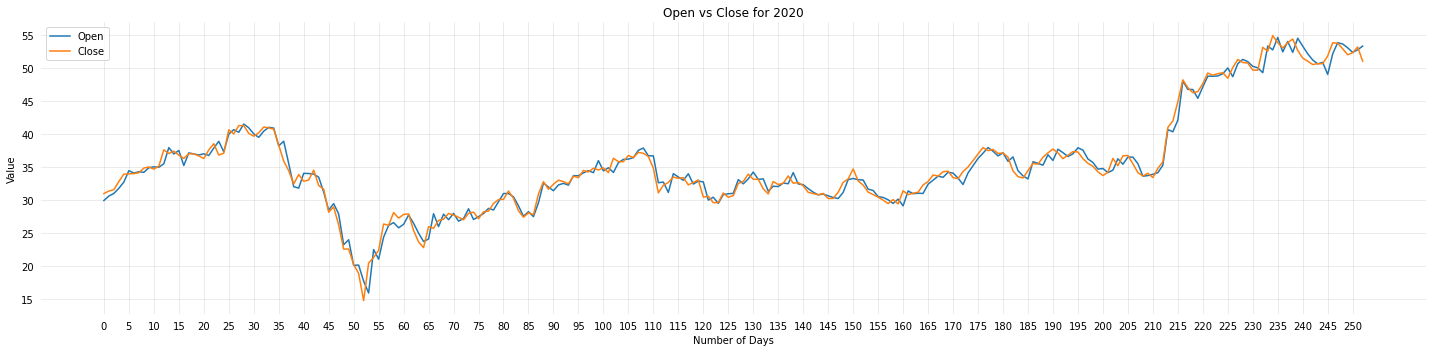

In [32]:
print("Distribution Variance for Open vs Close : {:.2f}".format(np.linalg.norm(data_filtered.Open - data_filtered.Close)))
plt.rcParams["axes.linewidth"]="0"
plt.figure(figsize=(20,5))
plt.plot(list(range(data_filtered.Date.size)),data_filtered.Open,label="Open")
plt.plot(list(range(data_filtered.Date.size)),data_filtered.Close,label="Close")
plt.tick_params(bottom=False,left=False)
plt.title("Open vs Close for 2020")
plt.xlabel("Number of Days")
plt.ylabel("Value")
plt.xticks(np.arange(0,data_filtered.Open.size+1,5))
plt.grid(True,linewidth=0.5,alpha=0.5)
plt.legend()
plt.tight_layout()

In [33]:
print("Highest Opening Price Date : ",data_filtered[data_filtered.Open == data_filtered.Open.max()].Date.values[0])
print("Highest Closing Price Date : ",data_filtered[data_filtered.Close == data_filtered.Close.max()].Date.values[0])

print("Lowest Opening Price Date  : ",data_filtered[data_filtered.Open == data_filtered.Open.min()].Date.values[0])
print("Lowest Closing Price Date  : ",data_filtered[data_filtered.Close == data_filtered.Close.min()].Date.values[0])


Highest Opening Price Date :  2020-12-07
Highest Closing Price Date :  2020-12-04
Lowest Opening Price Date  :  2020-03-19
Lowest Closing Price Date  :  2020-03-18


Inference : A higher opening and closing price was observed on 235th and 234th day respectively.
A relatively low opening price was observed on 53th day and a lowest closing price was observed on 52nd day.
A relatively higher value of Distribution Variance (16.51) with previous year tells that Open and Close price
were numerically apart on average during each trading day pointing to the large change in stock prices throught
the year.

Distribution Variance for High vs Low   : 29.37


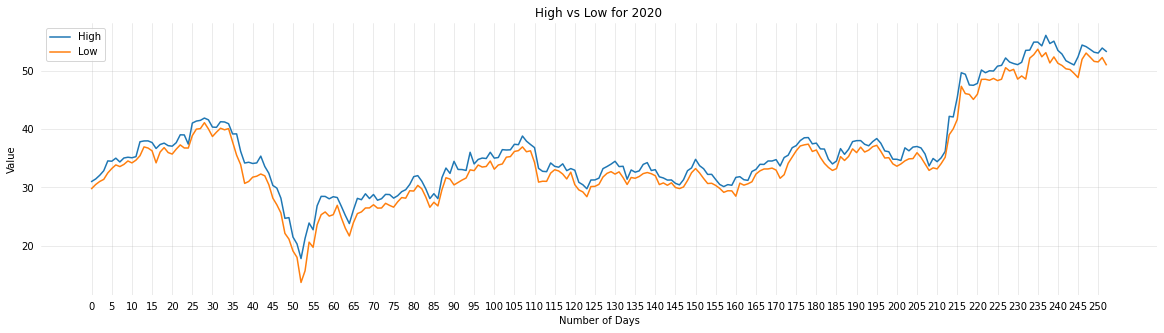

In [34]:
print("Distribution Variance for High vs Low   : {:.2f}".format(np.linalg.norm(data_filtered.High - data_filtered.Low)))
plt.rcParams["axes.linewidth"]="0"
plt.figure(figsize=(20,5))
plt.plot(list(range(data_filtered.Date.size)),data_filtered.High,label="High")
plt.plot(list(range(data_filtered.Date.size)),data_filtered.Low,label="Low")
plt.tick_params(bottom=False,left=False)
plt.title("High vs Low for 2020")
plt.xlabel("Number of Days")
plt.ylabel("Value")
plt.xticks(np.arange(0,data_filtered.Open.size+1,5))
plt.grid(True,linewidth=0.5,alpha=0.5)
plt.legend()
plt.show()

In [35]:
print("Peak High Price Date    : ",data_filtered[data_filtered.High == data_filtered.High.max()].Date.values[0])
print("Peak Low Price Date     : ",data_filtered[data_filtered.Low == data_filtered.Low.max()].Date.values[0])

print("Lowest High Price Date  : ",data_filtered[data_filtered.High == data_filtered.High.min()].Date.values[0])
print("Lowest Low Price Date   : ",data_filtered[data_filtered.Low == data_filtered.Low.min()].Date.values[0])

Peak High Price Date    :  2020-12-09
Peak Low Price Date     :  2020-12-07
Lowest High Price Date  :  2020-03-18
Lowest Low Price Date   :  2020-03-18


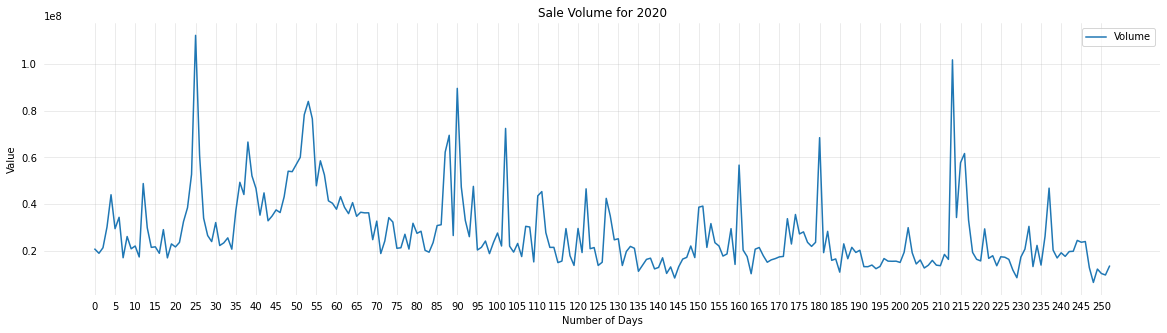

In [36]:
plt.rcParams["axes.linewidth"]="0"
plt.figure(figsize=(20,5))
plt.plot(list(range(data_filtered.Date.size)),data_filtered.Volume,label="Volume")
plt.tick_params(bottom=False,left=False)
plt.title("Sale Volume for 2020")
plt.xlabel("Number of Days")
plt.ylabel("Value")
plt.xticks(np.arange(0,data_filtered.Open.size+1,5))
plt.grid(True,linewidth=0.5,alpha=0.5)
plt.legend()
plt.show()

In [37]:
print("Peak Volume Date   : ",data_filtered[data_filtered.Volume == data_filtered.Volume.max()].Date.values[0])
print("Lowest Volume Date : ",data_filtered[data_filtered.Volume == data_filtered.Volume.min()].Date.values[0])

Peak Volume Date   :  2020-02-07
Lowest Volume Date :  2020-12-24


## Analysis for the year 2021

In [38]:
data_filtered = data[(data.Date >= "2021-01-01") & (data.Date <= "2021-12-31")]

In [39]:
print("Start Date : ",data_filtered.Date.min())
print("End Date   : ",data_filtered.Date.max())

Start Date :  2021-01-04
End Date   :  2021-12-31


In [40]:
print("Distribution Variance for Close vs Adj Close : {:.2f}".format(np.linalg.norm(data_filtered.Close - data_filtered["Adj Close"])))

Distribution Variance for Close vs Adj Close : 0.00


Distribution Variance for Open vs Close : 18.98


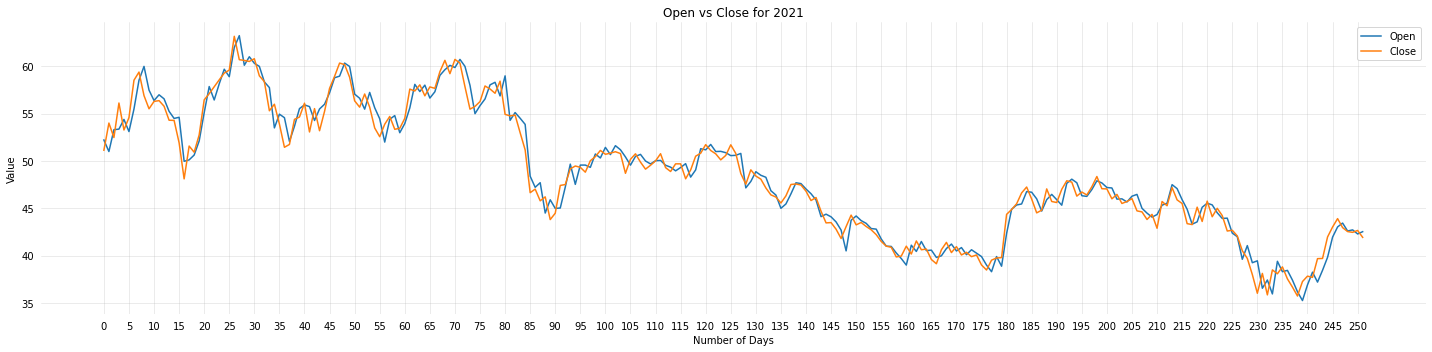

In [41]:
print("Distribution Variance for Open vs Close : {:.2f}".format(np.linalg.norm(data_filtered.Open - data_filtered.Close)))
plt.rcParams["axes.linewidth"]="0"
plt.figure(figsize=(20,5))
plt.plot(list(range(data_filtered.Date.size)),data_filtered.Open,label="Open")
plt.plot(list(range(data_filtered.Date.size)),data_filtered.Close,label="Close")
plt.tick_params(bottom=False,left=False)
plt.title("Open vs Close for 2021")
plt.xlabel("Number of Days")
plt.ylabel("Value")
plt.xticks(np.arange(0,data_filtered.Open.size+1,5))
plt.grid(True,linewidth=0.5,alpha=0.5)
plt.legend()
plt.tight_layout()

In [42]:
print("Highest Opening Price Date : ",data_filtered[data_filtered.Open == data_filtered.Open.max()].Date.values[0])
print("Highest Closing Price Date : ",data_filtered[data_filtered.Close == data_filtered.Close.max()].Date.values[0])

print("Lowest Opening Price Date  : ",data_filtered[data_filtered.Open == data_filtered.Open.min()].Date.values[0])
print("Lowest Closing Price Date  : ",data_filtered[data_filtered.Close == data_filtered.Close.min()].Date.values[0])

Highest Opening Price Date :  2021-02-11
Highest Closing Price Date :  2021-02-10
Lowest Opening Price Date  :  2021-12-14
Lowest Closing Price Date  :  2021-12-13


Inference : A higher opening and closing price was observed on 26th and 26th trading day respectively.
A relatively low opening price was observed on 177th trading day and a lowest closing price was observed on 176th
trading day. A relatively higher value of Distribution Variance (16.80) tells that Open and Close price 
were numerically apart on average during each trading day pointing to the large change in stock prices
throught the year.

Distribution Variance for High vs Low   : 33.05


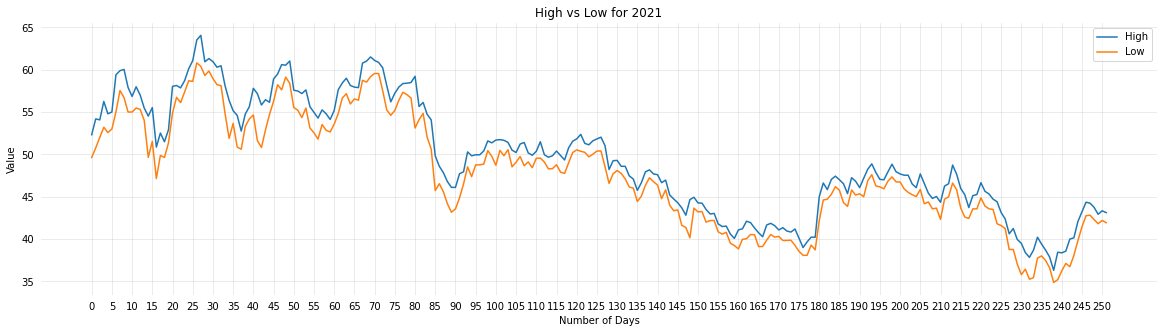

In [43]:
print("Distribution Variance for High vs Low   : {:.2f}".format(np.linalg.norm(data_filtered.High - data_filtered.Low)))
plt.rcParams["axes.linewidth"]="0"
plt.figure(figsize=(20,5))
plt.plot(list(range(data_filtered.Date.size)),data_filtered.High,label="High")
plt.plot(list(range(data_filtered.Date.size)),data_filtered.Low,label="Low")
plt.tick_params(bottom=False,left=False)
plt.title("High vs Low for 2021")
plt.xlabel("Number of Days")
plt.ylabel("Value")
plt.xticks(np.arange(0,data_filtered.Open.size+1,5))
plt.grid(True,linewidth=0.5,alpha=0.5)
plt.legend()
plt.show()

In [44]:
print("Peak High Price Date    : ",data_filtered[data_filtered.High == data_filtered.High.max()].Date.values[0])
print("Peak Low Price Date     : ",data_filtered[data_filtered.Low == data_filtered.Low.max()].Date.values[0])

print("Lowest High Price Date  : ",data_filtered[data_filtered.High == data_filtered.High.min()].Date.values[0])
print("Lowest Low Price Date   : ",data_filtered[data_filtered.Low == data_filtered.Low.min()].Date.values[0])

Peak High Price Date    :  2021-02-11
Peak Low Price Date     :  2021-02-10
Lowest High Price Date  :  2021-12-13
Lowest Low Price Date   :  2021-12-13


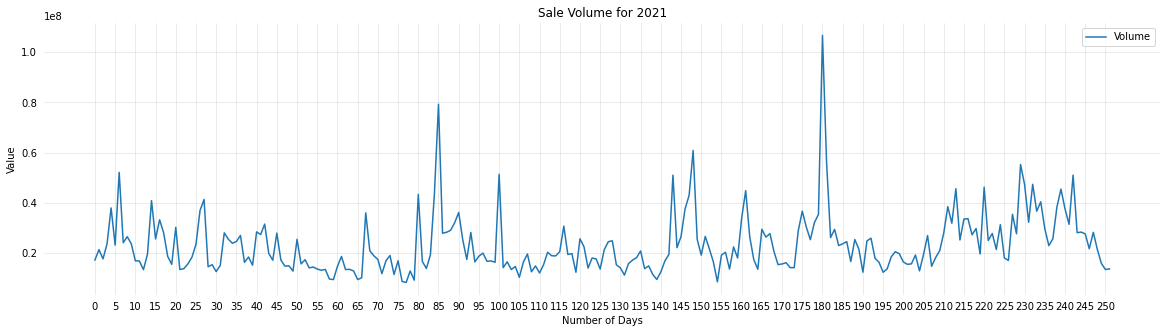

In [45]:
plt.rcParams["axes.linewidth"]="0"
plt.figure(figsize=(20,5))
plt.plot(list(range(data_filtered.Date.size)),data_filtered.Volume,label="Volume")
plt.tick_params(bottom=False,left=False)
plt.title("Sale Volume for 2021")
plt.xlabel("Number of Days")
plt.ylabel("Value")
plt.xticks(np.arange(0,data_filtered.Open.size+1,5))
plt.grid(True,linewidth=0.5,alpha=0.5)
plt.legend()
plt.show()

In [46]:
print("Peak Volume Date   : ",data_filtered[data_filtered.Volume == data_filtered.Volume.max()].Date.values[0])
print("Lowest Volume Date : ",data_filtered[data_filtered.Volume == data_filtered.Volume.min()].Date.values[0])

Peak Volume Date   :  2021-09-21
Lowest Volume Date :  2021-04-26
